In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAvo = pd.read_csv('./avo_change_dates.csv')
dfAvo = dfAvo.drop('Unnamed: 0', axis=1)
dfAvo

,Date,AveragePrice,price',Price Change
0,2015-01-04,1.301296,NaN,True
1,2015-01-11,1.370648,0.069352,False
2,2015-01-18,1.391111,0.020463,False
3,2015-01-25,1.397130,0.006019,True
4,2015-02-01,1.247037,-0.150093,True
...,...,...,...,...
164,2018-02-25,1.359630,-0.014444,False
165,2018-03-04,1.350185,-0.009444,False
166,2018-03-11,1.335093,-0.015093,False
167,2018-03-18,1.313704,-0.021389,True


In [3]:
df = pd.read_csv('./macroCleaned.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,GDP,GNP,Unemployment Rate,Labor Force Participation Rate,Personal Consumption Expenditures,Trade Balance,Real Export,Personal Income,Personal Saving,quarter,year,date
0,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
1,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-02-01
2,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-03-01
3,18306.960,18520.403,5.1,62.5,12347.7,-42062.0,-3.3,13809.6,1009.9,Q2,2015,2015-04-01
4,18306.960,18520.403,5.1,62.5,12347.7,-42062.0,-3.3,13809.6,1009.9,Q2,2015,2015-05-01
5,18306.960,18520.403,5.1,62.5,12347.7,-42062.0,-3.3,13809.6,1009.9,Q2,2015,2015-06-01
6,18332.079,18565.145,5.0,62.6,12397.5,-40776.0,-0.6,13881.5,1027.0,Q3,2015,2015-07-01
7,18332.079,18565.145,5.0,62.6,12397.5,-40776.0,-0.6,13881.5,1027.0,Q3,2015,2015-08-01
8,18332.079,18565.145,5.0,62.6,12397.5,-40776.0,-0.6,13881.5,1027.0,Q3,2015,2015-09-01
9,17991.348,18214.218,5.5,62.7,12083.9,-40500.0,-3.2,13593.1,1074.9,Q4,2015,2015-10-01


In [4]:
# combine dataframes based on date
dfAvo['Date'] = pd.to_datetime(dfAvo['Date'])

dfAvo['YearMonth'] = dfAvo['Date'].dt.strftime('%Y-%m' + '-01')

combined_df = dfAvo.merge(df, left_on='YearMonth', right_on='date', how='inner')

combined_df = combined_df.drop(columns='YearMonth')

combined_df

,Date,AveragePrice,price',Price Change,GDP,GNP,Unemployment Rate,Labor Force Participation Rate,Personal Consumption Expenditures,Trade Balance,Real Export,Personal Income,Personal Saving,quarter,year,date
0,2015-01-04,1.301296,NaN,True,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
1,2015-01-11,1.370648,0.069352,False,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
2,2015-01-18,1.391111,0.020463,False,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
3,2015-01-25,1.397130,0.006019,True,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-01-01
4,2015-02-01,1.247037,-0.150093,True,18193.707,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015,2015-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.359630,-0.014444,False,20470.197,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-02-01
165,2018-03-04,1.350185,-0.009444,False,20470.197,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-03-01
166,2018-03-11,1.335093,-0.015093,False,20470.197,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-03-01
167,2018-03-18,1.313704,-0.021389,True,20470.197,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018,2018-03-01


In [5]:
combined_df.to_csv('./combined_alldates.csv')

<AxesSubplot:>

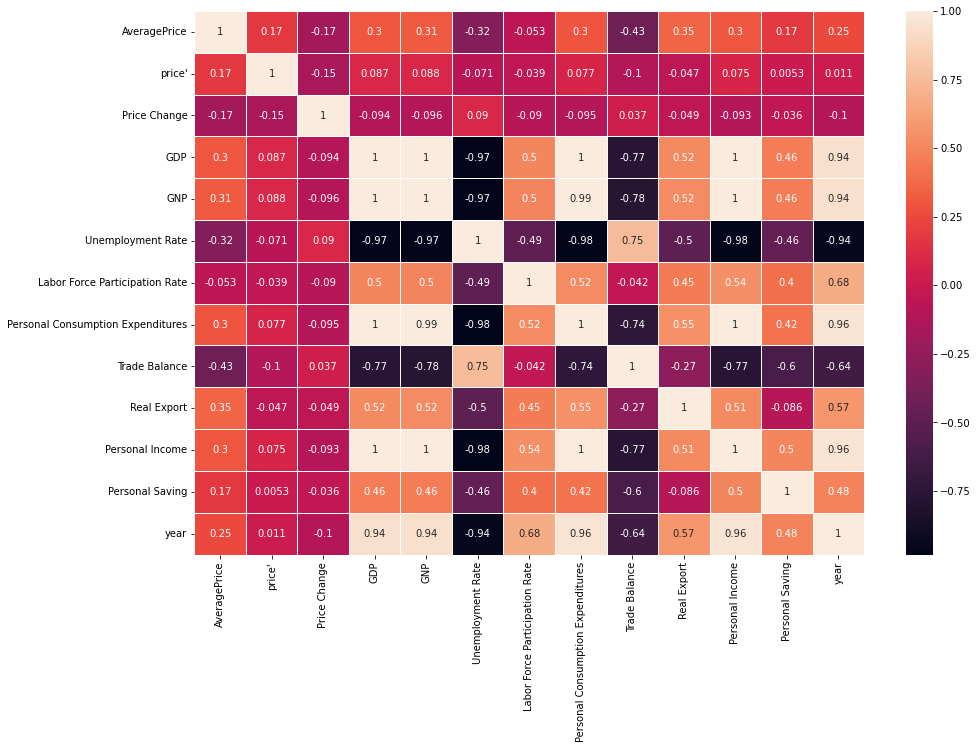

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(combined_df.corr(), annot=True,linewidths=.5, ax=ax)